In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SAPGB = pd.read_excel(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\SAP_GB_20180101-20230122.xlsx", sheet_name='System Average Price')

SAPGBdata = pd.DataFrame({"SAP Actual Day|GB": SAPGB.iloc[1097:1827,1]})
SAPGBdata["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "SAP Actual Day|GB"]

SAPGBdata = SAPGBdata.reindex(columns=NewOrder)
SAPGBdata

,Date,SAP Actual Day|GB
1097,2021-01-01,1.9499
1098,2021-01-02,1.9578
1099,2021-01-03,1.9439
1100,2021-01-04,2.0391
1101,2021-01-05,1.8698
...,...,...
1822,2022-12-27,6.4625
1823,2022-12-28,5.8369
1824,2022-12-29,5.7103
1825,2022-12-30,5.8352


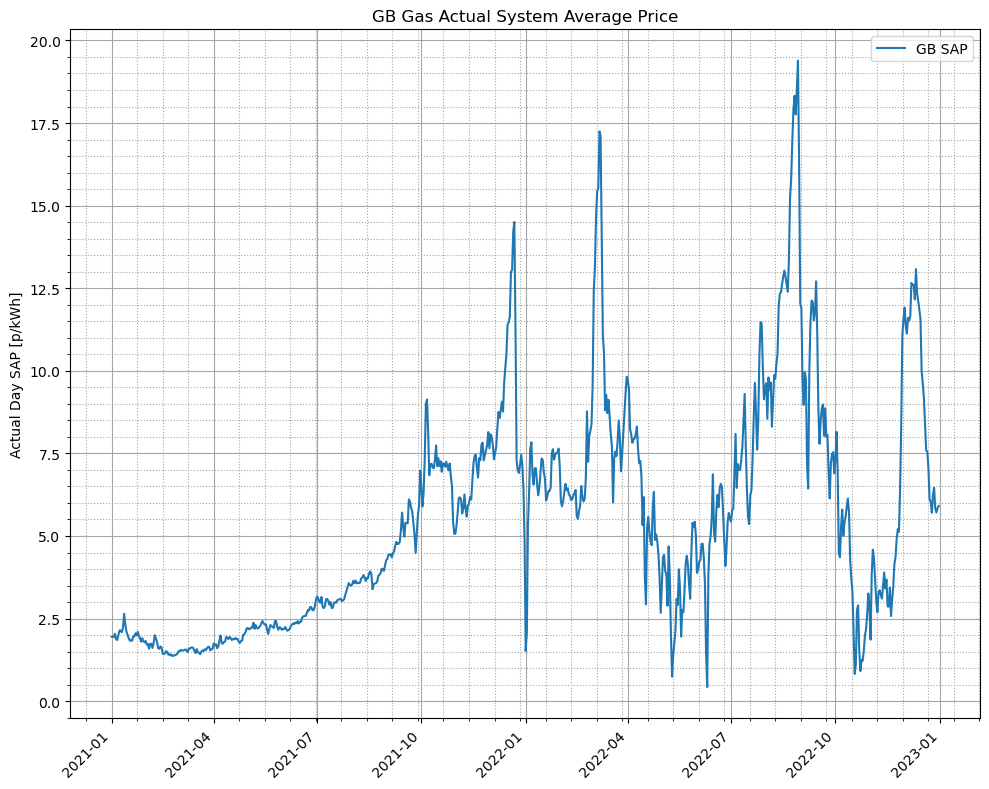

(18591.55, 19393.45)


In [6]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('GB Gas Actual System Average Price')
plt.ylabel('Actual Day SAP [p/kWh]')

ax.plot(SAPGBdata["Date"], SAPGBdata["SAP Actual Day|GB"], label="GB SAP")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()
print(ax.get_xlim())